# Top 100 Words Closest to "Queer" for Woolf

In [10]:
import gensim
import gensim.models
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os
from gensim import corpora
from pprint import pprint
from gensim.test.utils import datapath
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

In [4]:
#loading txt file and turning it into courpus

# class MyCorpus:
#     def __iter__(self):
#         corpus_path = datapath('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\woolfcorpus.txt')    
#         for line in open(corpus_path, encoding = 'latin-1'):
#             yield gensim.utils.simple_preprocess(line)

# import gensim.models

# sentences = MyCorpus()

In [11]:
from random import choices
from scipy.spatial.distance import cosine
import numpy as np

In [44]:
file = open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\woolfcorpus.txt', 'r', encoding = 'latin-1')
data = file.read()
words = data.split()

print('Number of words in text file :', len(words))

Number of words in text file : 1760779


In [5]:
# %%time
# model = gensim.models.Word2Vec(sentences, iter=100)

Wall time: 8min 14s


In [6]:
# # Save the model
# model.save("woolf_word2vec.model")

In [7]:
# # Load the model
# model = gensim.models.Word2Vec.load("woolf_word2vec.model")

In [12]:
def paragraphize(linelist): 
    paragraphlist = []
    sentence = []
    scount = 0
    for line in linelist:
        words = line.strip().split()
        for w in words:
            if not w.endswith('.'):
                sentence.append(w)
            elif scount < 2:
                sentence.append(w)
                scount += 1
            else:
                scount = 0
                sentence.append(w)
                stext = ' '.join(sentence)
                sentence = []
                paragraphlist.append(stext)
    print(len(linelist), len(paragraphlist))
    
    return paragraphlist

In [13]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\woolfcorpus.txt', encoding = 'latin-1') as f:
    wlines = f.readlines()

In [14]:
# wparagraphs = paragraphize(wlines)

166559 31471


In [15]:
# for i in range(1):
#     wsample = choices(wparagraphs, k = len(wparagraphs))
#     class MyCorpus:
#             def __iter__(self):
#                 global wsample    
#                 for line in wsample:
#                     yield gensim.utils.simple_preprocess(line)

#     sentences = MyCorpus()

In [16]:
# %%time
# model = gensim.models.Word2Vec(sentences, iter=100)

Wall time: 5min 42s


In [17]:
# Load the model
model = gensim.models.Word2Vec.load("woolf_word2vec.model")

In [8]:
vector = model.wv['queer']  # get numpy vector of queer

In [31]:
sims = model.wv.most_similar('queer', topn=100)  # get top100 similar words
sims

[('awfully', 0.385651171207428),
 ('sized', 0.37115126848220825),
 ('young', 0.36801040172576904),
 ('suspected', 0.3652426600456238),
 ('absorption', 0.35453736782073975),
 ('posing', 0.3511541485786438),
 ('nice', 0.3499513566493988),
 ('maisie', 0.3435806930065155),
 ('oblivion', 0.3387223780155182),
 ('horrors', 0.32626646757125854),
 ('speeches', 0.323294073343277),
 ('evanescent', 0.31067633628845215),
 ('reputed', 0.3062557578086853),
 ('just', 0.3011806011199951),
 ('blotted', 0.30039259791374207),
 ('buzzing', 0.29972130060195923),
 ('dreaded', 0.2958635687828064),
 ('basins', 0.29578498005867004),
 ('perennial', 0.2948506474494934),
 ('assuring', 0.29381296038627625),
 ('booming', 0.2924637198448181),
 ('bent', 0.2912786900997162),
 ('hailed', 0.29016220569610596),
 ('tender', 0.28999805450439453),
 ('twice', 0.2898043096065521),
 ('lampsher', 0.28842049837112427),
 ('walsh', 0.2876507043838501),
 ('heavens', 0.28620970249176025),
 ('kissing', 0.2838011384010315),
 ('caen', 0

In [32]:
import pandas as pd
df = pd.DataFrame(sims) # make sims a dataframe
df_new = df.rename(columns={'words': '0', 'similarity score': '1'})

In [33]:
woolf_queersimilar = df_new[0].tolist()
#woolf_queersimilar # get top 100 words as a list
woolf_queersimilar.append('queer')
#add 'queer' to list

### Catagorizing Sentiments from a List of Top 100 Words Closest to Queer

In [34]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liunegative.txt', encoding = 'utf-8') as f:
    negative_words = [x.strip() for x in f.readlines()]
    
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liupositive.txt', encoding = 'utf-8') as f:
    positive_words = [x.strip() for x in f.readlines()]

In [35]:
%matplotlib notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [36]:
#turn my list into a data frame where each row represents an embedding.

vectordict = dict()
for v in woolf_queersimilar:
    vectordict[v] = model.wv[v]

In [37]:
vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
vectordf.tail(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
sized,1.606333,-0.869210,-2.507367,-1.859168,1.434890,-0.158544,-2.277033,-2.272214,-0.576821,-0.346176,...,-1.333951,0.165311,-0.163780,1.906535,1.745098,-0.885062,5.065475,-5.091738,1.913603,-1.884450
young,6.191288,-1.143396,-4.742549,0.004800,0.016193,4.621982,-0.191009,-3.614601,-3.734231,-0.417801,...,0.832020,-1.497021,3.240499,4.345145,-1.504297,3.636889,5.691154,2.718542,-1.191742,1.761061
suspected,-1.985388,12.434824,-4.047352,-8.561573,-4.303199,-3.840161,7.828819,-1.950431,-0.331284,-5.438053,...,3.820863,3.002958,6.469109,-3.732509,-10.190223,-1.961528,0.165500,0.550867,0.834569,0.210626
absorption,3.465932,1.159716,-1.388433,-2.716668,1.547858,5.092968,8.282663,-4.524538,-0.820576,-0.096332,...,-2.945629,2.827819,1.234617,-1.616257,-3.009749,0.712051,7.145722,1.547838,-0.489009,2.969972
posing,2.009375,0.563683,-0.598500,1.796049,0.907005,-1.182146,1.631222,-0.492819,-0.168493,-0.256953,...,-3.403295,-1.829387,-0.365474,1.437822,2.193220,-0.427924,4.621830,-1.986856,-2.404071,2.154320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hitching,-1.796487,2.112364,-0.889632,-0.223592,0.550964,-3.588272,-1.040576,0.789838,-1.611560,-3.874018,...,-0.224952,-0.053582,0.253469,0.408922,0.785936,-2.165139,2.590904,-1.226060,-2.635577,2.227825
diction,2.379694,4.239462,1.225654,1.413565,7.277782,0.645794,-0.947039,-2.309748,2.679639,0.219590,...,-4.128097,1.523762,-5.000111,2.641575,0.056799,1.260056,0.408801,-0.468829,3.382775,-2.298178
mentioned,4.634197,-0.737022,0.815624,7.281428,-0.388801,1.840170,2.452973,2.072985,2.677554,-6.293023,...,-5.039588,0.503682,6.172050,-6.501504,5.146559,-6.580735,0.113387,0.718193,5.559217,9.999049
tidy,-2.672771,3.733970,2.815051,2.315269,7.734205,-1.156407,-1.811527,-0.738097,1.524263,0.114195,...,-4.148007,1.350484,2.015689,-0.000858,-0.544004,5.555887,5.007004,3.014357,3.143590,4.046318


In [38]:
#use dimension-reduction techniques to flatten it into a plane
def vocab2pca(woolf_queersimilar):
    
    vectordict = dict()
    for v in woolf_queersimilar:
        vectordict[v] = model.wv[v]
        
    vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
    
    vectorlengths = np.linalg.norm(vectordf, ord = 2, axis = 1)   # normalize vector lengths
    vectordf = vectordf.divide(vectorlengths, axis = 'rows')      # for PCA
    
    pca = PCA(n_components = 2)       
    components = pca.fit_transform(vectordf)                      # perform PCA
    plotframe = pd.DataFrame({'x': components[ : , 0], 'y': components[ : , 1]}, index = woolf_queersimilar)
    
    return plotframe

In [39]:
plotframe = vocab2pca(woolf_queersimilar)
plotframe

,x,y
awfully,-0.102872,0.257794
sized,-0.080261,0.192948
young,0.206238,-0.015855
suspected,0.018124,-0.032310
absorption,0.080806,-0.057937
...,...,...
hitching,0.119640,-0.258599
diction,-0.032823,-0.053600
mentioned,0.229967,-0.060041
tidy,0.146975,-0.192005


In [40]:
negativelist_woolf = [w for w in woolf_queersimilar if w in negative_words]
#negativelist_woolf.remove('queer')
positivelist_woolf = [w for w in woolf_queersimilar if w in positive_words]
neutrallist_woolf = [w for w in woolf_queersimilar if w not in (negative_words + positive_words)]

In [41]:
plotframe_negative_woolf = vocab2pca(negativelist_woolf)
plotframe_positive_woolf = vocab2pca(positivelist_woolf)
plotframe_neutral_woolf = vocab2pca(neutrallist_woolf)
plotframe_negative_woolf
plotframe_queer_woolf = plotframe_negative_woolf[(plotframe_negative_woolf.index == 'queer')] #save 'queer' in separate dataframe
plotframe_negative_woolf = plotframe_negative_woolf.drop(['queer']) #drop 'queer' from plotframe_negative_woolf
plotframe_negative_woolf['sentiment']='negative' #add sentiment columns 
plotframe_positive_woolf['sentiment']='positive'
plotframe_neutral_woolf['sentiment']='neutral'
plotframe_queer_woolf['sentiment']='queer'
plotframe_sentiment = pd.concat([plotframe_negative_woolf,plotframe_positive_woolf,plotframe_neutral_woolf,plotframe_queer_woolf]) #combine dataframes for plot
plotframe_sentiment

,x,y,sentiment
awfully,-0.173116,0.049595,negative
buzzing,0.460049,0.162059,negative
bent,0.221352,-0.407225,negative
immovable,-0.483762,-0.243646,negative
sucked,0.077467,-0.455266,negative
...,...,...,...
groom,-0.137556,0.187966,neutral
hitching,0.325956,-0.135776,neutral
diction,-0.019370,-0.046200,neutral
mentioned,0.308908,0.064552,neutral


### Visualization

In [42]:
def plot_the_frame(plotframe_sentiment):    
    plt.figure(figsize = (20, 22))
    color_dict = dict({'positive':'green', 'neutral':'blue','negative':'red','queer':'purple'})
    theplot = sns.scatterplot(x = plotframe_sentiment.iloc[ : , 0], y = plotframe_sentiment.iloc[ : , 1], hue=plotframe_sentiment.iloc[ : , 2], palette=color_dict)
    collabels = plotframe_sentiment.columns.tolist()
    theplot.set(xlabel = collabels[0], ylabel = collabels[1])


    for rownum in range(plotframe_sentiment.shape[0]):
        x = plotframe_sentiment.iloc[rownum, 0]
        y = plotframe_sentiment.iloc[rownum, 1]
        theplot.text(x + 0.003, y + .003, 
        plotframe_sentiment.index[rownum], horizontalalignment='left', 
        size='small', color='black', fontsize=10, weight='semibold')

    plt.title('Sentiments of the Top 100 Words Closest to Queer (Woolf)', fontsize=15)
    plt.savefig('queersentiment_woolf_04282022.png')
    plt.show()

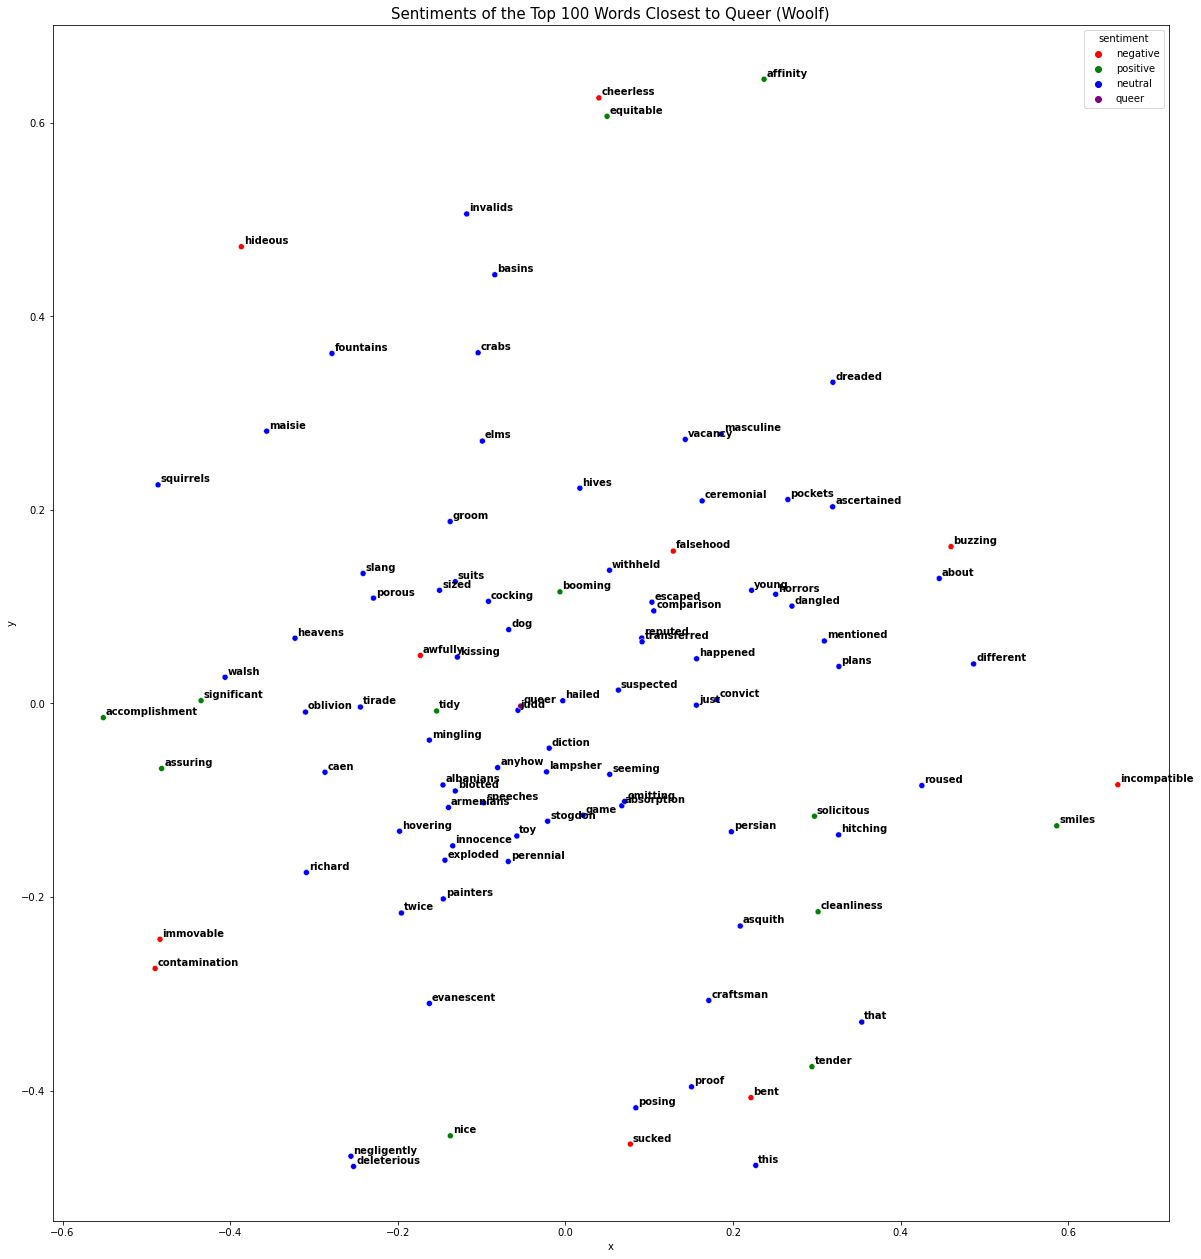

In [43]:
plot_the_frame(plotframe_sentiment)